In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

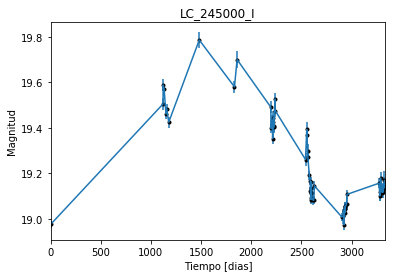

In [2]:
data = np.genfromtxt('LC_245000_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_245000_I')
plt.savefig("LC_245000_I.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

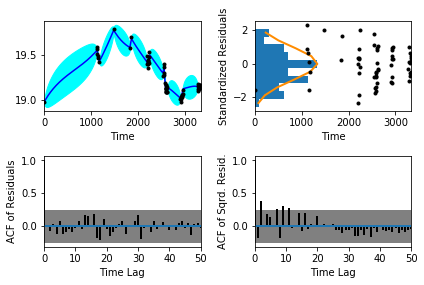

In [5]:
sample.assess_fit()

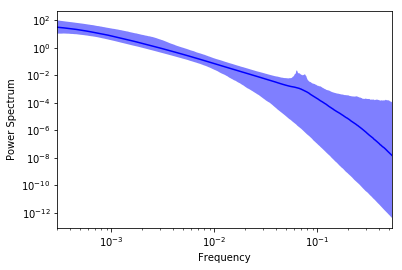

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

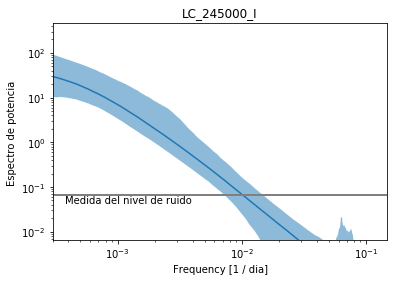

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_245000_I')
plt.savefig("Medida del nivel de ruido_I.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_245000_I')

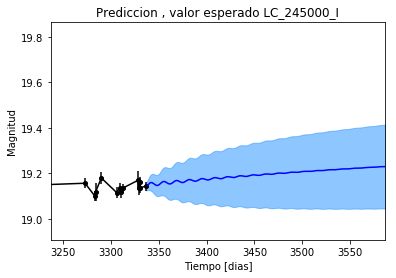

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_245000_I')

Text(0.5,1,'Prediccion, Caminos simulados_LC_245000_I')

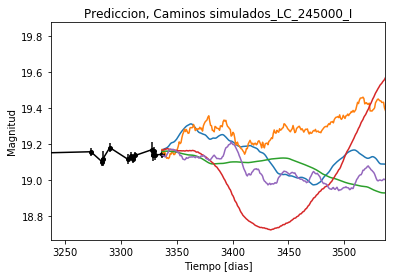

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_245000_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


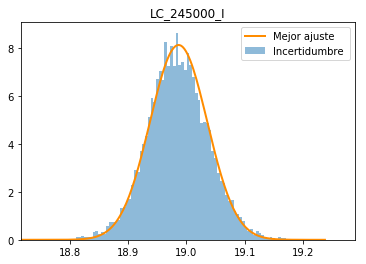

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_245000_I')
plt.savefig("Mejor_ajuste_LC_245000_I.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_245000_I')

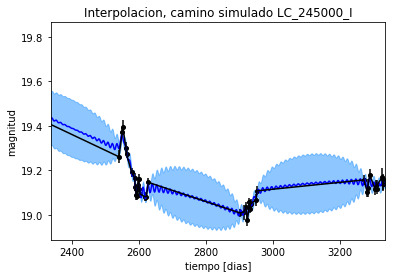

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_245000_I')

Text(0.5,1,'Interpolacion, camino simulado LC_245000_I')

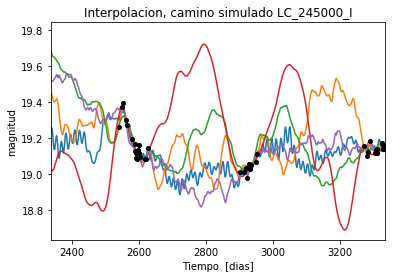

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_245000_I')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 868.236198414
Median: 0.0258314928232
Standard deviation: 0.205268420488
68% credibility interval: [ 0.00211662  0.22267186]
95% credibility interval: [  4.44528234e-04   8.17578885e-01]
99% credibility interval: [  3.21811790e-04   1.01684344e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 900.476108958
Median: 0.0142631696571
Standard deviation: 0.139794957148
68% credibility interval: [ 0.00106259  0.1181154 ]
95% credibility interval: [  3.37483500e-04   4.88704369e-01]
99% credibility interval: [  3.07331028e-04   9.39220068e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 824.917658938
Median: 0.0723435104882
S

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 351.020998819
Median: 116.350057787
Standard deviation: 2.30296822985
68% credibility interval: [ 113.69981129  118.14384639]
95% credibility interval: [ 110.69888679  119.58369008]
99% credibility interval: [ 108.68543957  120.22458253]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 393.045260446
Median: 1.25384937326
Standard deviation: 2.75901342373
68% credibility interval: [ 0.14873382  4.96701583]
95% credibility interval: [ 0.03985711  9.52022901]
99% credibility interval: [  0.02113754  13.25963668]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 399.688387668
Median: 2.73013238889
Standard deviation: 14.8321485534
68% credibility interval: [  0.21785839  21.20210958]
95% credibility interval: [  2.50130865e

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 20020.1084007
Median: 2.37089724699e-16
Standard deviation: 9.03665040552e+50
68% credibility interval: [  1.94263530e-38   1.99728186e-03]
95% credibility interval: [  8.86862657e-55   1.97391682e+21]
99% credibility interval: [  2.37461872e-62   8.40856903e+37]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1269.86275904
Median: 19.3090917931
Standard deviation: 0.124504053852
68% credibility interval: [ 19.18938368  19.41889391]
95% credibility interval: [ 19.05023932  19.5464033 ]
99% credibility interval: [ 18.94885635  19.66779141]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 450.967987522
Median: 0.116755730071
Standard deviation: 0.297954627111
68% credibility interval: [ 0.          0.62048555]
95% credibility interval: [ 0.          0.98810318]
99% credibility interval: [ 0.          1.04167626]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 450.967987522
Median: 0.116755730071
Standard deviation: 0.297954627111
68% credibility interval: [ 0.          0.62048555]
95% credibility interval: [ 0.          0.98810318]
99% credibility interval: [ 0.          1.04167626]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 739.618624129
Median: 0.0
Standard deviation: 0.000328304815587
68% cred

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 351.020998819
Median: 116.350057787
Standard deviation: 2.30296822985
68% credibility interval: [ 113.69981129  118.14384639]
95% credibility interval: [ 110.69888679  119.58369008]
99% credibility interval: [ 108.68543957  120.22458253]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1365.72178667
Median: 0.0615374683673
Standard deviation: 0.0473732740906
68% credibility interval: [ 0.04296677  0.09715498]
95% credibility interval: [ 0.03041274  0.17760053]
99% credibility interval: [ 0.02582028  0.31110738]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 575.219763239
Median: 1.15062890458
Standard deviation: 0.248785330271
68% credibility interval: [ 0.93043746  1.4314525 ]
95% credibility interval: [ 0.77489937  1.7349496 ]
99% credibility interval: [ 0.69271706  1.89384982]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 466.196455863
Median: 0.0111909557218
Standard deviation: 0.493437088435
68% credibility interval: [ 0.00027928  0.26090679]
95% credibility interval: [  3.95152816e-24   1.56733589e+00]
99% credibility interval: [  6.98923680e-41   3.09412624e+00]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 868.236198414
Median: (-0.162304056169-2.37234096856j)
Standard deviation: 2.27336797112
68% credibility interval: [-1.39908857-0.82591823j -0.01329910-2.96448498j]
95% credibility interval: [ -5.13699964e+00+0.j          -2.79305327e-03-0.45007477j]
99% credibility interval: [ -6.38901577e+00-4.42302044j  -2.02200311e-03-0.43277201j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 900.476108958
Median: (-0.0896181380231+2.81568697049j)
Standard deviation: 2.0679182777
68% credibility interval: [-0.74214095+0.j         -0.00667643+1.43798543j]
95% credibility interval: [ -3.07062011e+00+3.56416788j  -2.12047137e-03+4.65295018j]
99% credibility interval: [ -5.90129373e+00+6.28725696j  -1.93101780e-03+0.j        ]
Poster